In [127]:
import pandas as pd

titanic_data = pd.read_csv("D:/nltk/name_classification/data/titanic/train.csv")

unwanted_features = ['PassengerId','Name','Ticket','Cabin','SibSp','Parch','Embarked']
titanic_data = titanic_data.drop(unwanted_features,axis=1)
titanic_data = titanic_data.dropna()

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

titanic_data['Sex'] = le.fit_transform(titanic_data['Sex'])

features = ['Pclass','Sex','Age','Fare']
titanic_features = titanic_data[features]

titanic_features = pd.get_dummies(titanic_features,columns=['Pclass'])

titanic_target = titanic_data[['Survived']]

from sklearn.model_selection import train_test_split

X_train,x_test,Y_train,y_test = train_test_split(titanic_features,titanic_target,test_size=0.2,random_state=0)

import torch
import numpy as np

Xtrain_ = torch.from_numpy(X_train.values).float()
Xtest_ = torch.from_numpy(x_test.values).float()

Ytrain_ = torch.from_numpy(Y_train.values).view(1,-1)[0]
Ytest_ = torch.from_numpy(y_test.values).view(1,-1)[0]

import torch
import torch.nn as nn
import torch.nn.functional as F

input_size = 6
output_size = 2
hidden_size =10

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size,hidden_size)
        self.fc3 = nn.Linear(hidden_size,output_size)

    def forward(self,x):
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x,dim=-1)

model=Net()
import torch.optim as optim
optimizer = optim.Adam(model.parameters())
loss_fn=nn.NLLLoss()

epoch_data = []
epochs=1001

for epoch in range(1,epochs):
    optimizer.zero_grad()
    Ypred = model(Xtrain_)

    loss = loss_fn(Ypred,Ytrain_)
    loss.backward()

    optimizer.step()

    Ypred_test = model(Xtest_)
    loss_test = loss_fn(Ypred_test, Ytest_)

    _,pred = Ypred_test.data.max(1)

    accuracy = pred.eq(Ytest_.data).sum().item() / y_test.values.size
    epoch_data.append([epoch,loss.data.item(),loss_test.data.item(),accuracy])

    if epoch % 100 == 0:
        print('epoch - %d (%d%%) train loss - %.2f test loss - %.2f accuracy - %.4f' \
            %(epoch, epoch/150 *10 , loss.data.item(), loss_test.data.item(), accuracy))



epoch - 100 (6%) train loss - 0.69 test loss - 0.69 accuracy - 0.5664
epoch - 200 (13%) train loss - 0.64 test loss - 0.65 accuracy - 0.6084
epoch - 300 (20%) train loss - 0.61 test loss - 0.62 accuracy - 0.6923
epoch - 400 (26%) train loss - 0.60 test loss - 0.60 accuracy - 0.6783
epoch - 500 (33%) train loss - 0.58 test loss - 0.58 accuracy - 0.6783
epoch - 600 (40%) train loss - 0.54 test loss - 0.54 accuracy - 0.7413
epoch - 700 (46%) train loss - 0.49 test loss - 0.48 accuracy - 0.8322
epoch - 800 (53%) train loss - 0.46 test loss - 0.43 accuracy - 0.8322
epoch - 900 (60%) train loss - 0.45 test loss - 0.42 accuracy - 0.8392
epoch - 1000 (66%) train loss - 0.44 test loss - 0.41 accuracy - 0.8322


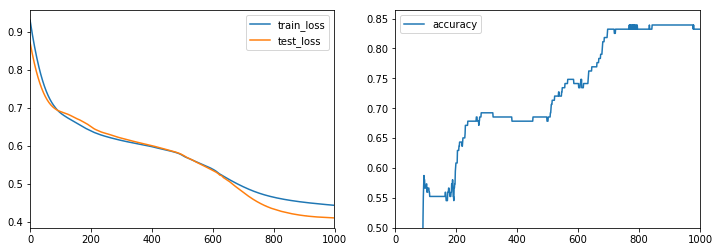

In [128]:


df_epochs_data = pd.DataFrame(epoch_data, columns=["epoch","train_loss","test_loss","accuracy"])
import matplotlib.pyplot as plt

f,(ax1,ax2) = plt.subplots(1,2, figsize=(12,4))
df_epochs_data[["train_loss","test_loss"]].plot(ax=ax1)
df_epochs_data[["accuracy"]].plot(ax=ax2)
plt.ylim(ymin=0.5)
plt.show()


In [169]:
print(Xtrain_[0])
print(Ytrain_[0])

model.eval

with torch.no_grad():
    input_to_test = Xtrain_[0]
    pred_out = model(input_to_test)
    print(pred_out)
    predicted = torch.max(pred_out.data)
    print(predicted)



tensor([ 0., 36., 13.,  0.,  1.,  0.])
tensor(1)
tensor([-1.6494, -0.2134])
tensor(-0.2134)
